In [1]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Change font pandas
plt.rcParams['font.family'] = 'consolas'

# 1. Realizar el EDA y preprocesamiento del dataset.

In [ ]:
df = pd.read_csv("./fish_data.csv")
df

In [3]:
# check the data types of the columns
df.dtypes

species       object
length       float64
weight       float64
w_l_ratio    float64
dtype: object

In [4]:
# check the missing values
df.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [5]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


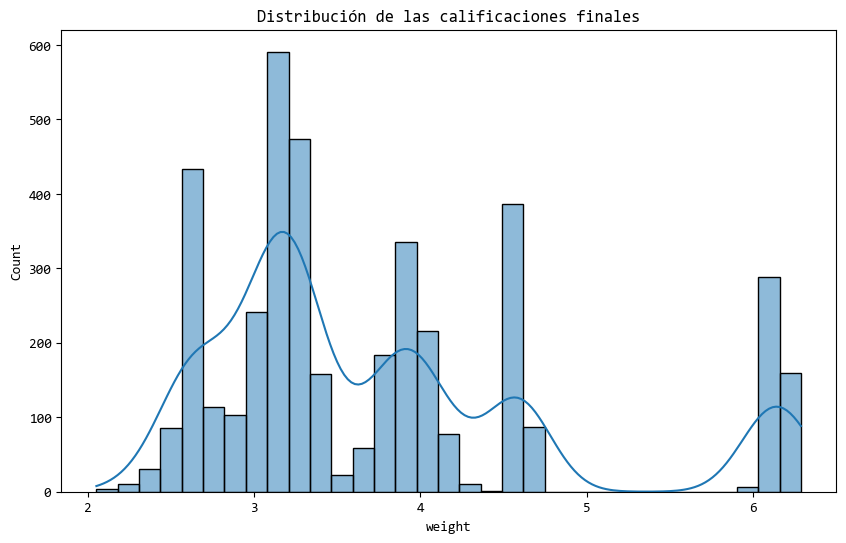

In [6]:
# Exploración visual: Distribución de calificaciones y otras variables importantes
plt.figure(figsize=(10, 6))
sns.histplot(df['weight'], kde=True)
plt.title('Distribución de las calificaciones finales')
plt.show()

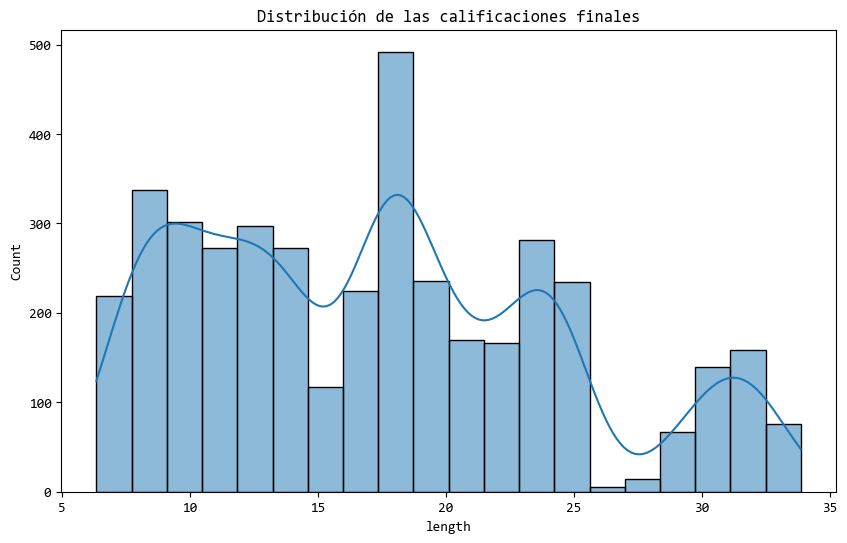

In [7]:
# Exploración visual: Distribución de calificaciones y otras variables importantes
plt.figure(figsize=(10, 6))
sns.histplot(df['length'], kde=True)
plt.title('Distribución de las calificaciones finales')
plt.show()

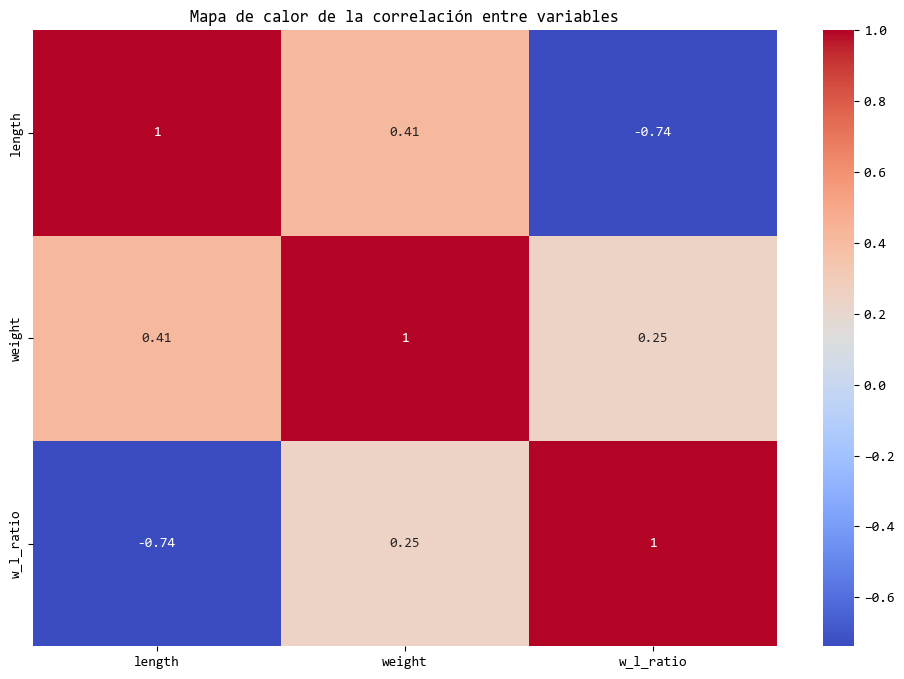

In [8]:
# Correlación entre las variables
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Mapa de calor de la correlación entre variables')
plt.show()

# 2. Aplique por lo menos dos métodos de clasificación a los datos (Justifique su elección).

In [9]:
# Importar librerías para clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
# categorical encoder and numeric
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [10]:
label_encoder = LabelEncoder()
df["species"] = label_encoder.fit_transform(df["species"])

# Separar características y la variable objetivo
X = df.drop(columns=["species"])  # Características
y = df["species"]  # Variable objetivo

#  Aplicar StandarScaler en X
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [11]:
# Aplicar Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Aplicar Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

Justificación:
- Logistic Regression es un modelo simple y eficiente para problemas de clasificación binaria.
- Random Forest es robusto frente a datos ruidosos y maneja bien características no lineales.

# 3. Realizar la validación del modelo eligiendo la métrica de validación más indicada para la tarea, realizar validación cruzada, escoja los parámetros que juzgue por conveniente (Justificar la métrica a utilizar y los parámetros de la validación cruzada).


In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Métricas de validación
print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_log_reg))
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))

# Validación cruzada con K-Fold (por ejemplo, K=5)
log_reg_cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='f1_macro')
rf_cv_scores = cross_val_score(random_forest, X, y, cv=5, scoring='f1_macro')

# Mostrar las puntuaciones
print("F1-Score Logistic Regression (Cross-Validation):", log_reg_cv_scores.mean())
print("F1-Score Random Forest (Cross-Validation):", rf_cv_scores.mean())

Accuracy Logistic Regression: 0.9215686274509803
Accuracy Random Forest: 0.928921568627451
F1-Score Logistic Regression (Cross-Validation): 0.9280725444118516
F1-Score Random Forest (Cross-Validation): 0.933059771677519


Justificación de la métrica: Usamos F1-score porque considera tanto precisión como sensibilidad, siendo útil en clases desbalanceadas.

# 4. Interprete los resultados obtenidos.

In [13]:
from sklearn.metrics import classification_report, f1_score

# Informe de clasificación para Logistic Regression
print("Classification Report Logistic Regression:")
print(classification_report(y_test, y_pred_log_reg))

# Informe de clasificación para Random Forest
print("Classification Report Random Forest:")
print(classification_report(y_test, y_pred_rf))

# Comparación de los resultados
print(f"F1-Score de Logistic Regression: {f1_score(y_test, y_pred_log_reg, average='macro'):.4f}")
print(f"F1-Score de Random Forest: {f1_score(y_test, y_pred_rf, average='macro'):.4f}")

Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.69      0.55      0.61        91
           3       1.00      1.00      1.00        86
           4       0.99      1.00      0.99        89
           5       1.00      0.99      1.00       102
           6       1.00      1.00      1.00        65
           7       0.66      0.78      0.71       100
           8       1.00      1.00      1.00        86

    accuracy                           0.92       816
   macro avg       0.93      0.92      0.92       816
weighted avg       0.92      0.92      0.92       816

Classification Report Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      1.00      1.00        77
           2       0.67      0.71      0.69        9

Interpretación : Los resultados muestran que tanto Logistic Regression como Random Forest logran una precisión alta en la clasificación de los estudiantes (92% y 93%, respectivamente). Sin embargo, Random Forest presenta un rendimiento ligeramente superior en términos de f1-score general (0.9325 vs 0.9239), lo que indica una mejor capacidad para equilibrar la precisión y el recall, especialmente en clases más desafiantes como la clase 7. Aunque ambos modelos son efectivos, Random Forest maneja mejor las variaciones entre las diferentes clases, lo que lo hace más adecuado para este conjunto de datos.